In [5]:
import beam as bm

In [6]:
import matplotlib.pyplot as plt

In [8]:
bm.change_default_parameter('decision', 'sw_mode', 'uniform')

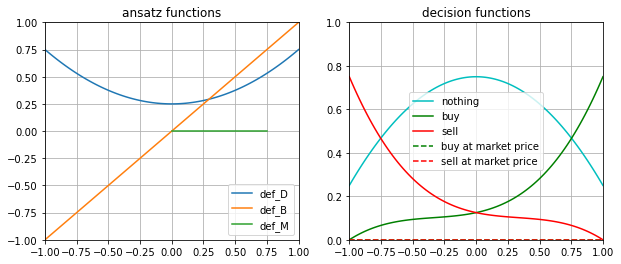

In [9]:
bm.show_default_decision_functions()

No handles with labels found to put in legend.


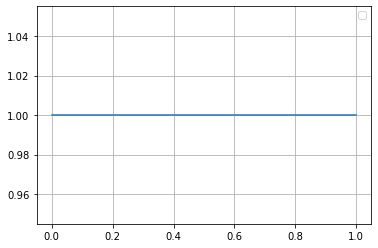

In [10]:
bm.show_default_sw_ansatz()

testing agent decision:
decision parameters:
    def_d_max : 0.75
    def_d_min : 0.25
    def_b_min : 0.0
    sw_mode : uniform
    eta_coeff : 55
    sw_coeff : eq_dist
    sw_coeff_minmax : 0.02
    sw_coeff_postmap : <function <lambda> at 0x00000269194DC040>
    price_fluct : 0.001
    reference_price : last
    subaction_par : 0.0


  0%|          | 0/11 [00:00<?, ?it/s]

C:\Users\Utente\Desktop\Beam\beam.py:3678: RuntimeWarning: Mean of empty slice.
  pos_avg=np.array([val for val in sigma_new_theta[sigma_old] if val>0]).mean()
C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Utente\Desktop\Beam\beam.py:3679: RuntimeWarning: Mean of empty slice.
  neg_avg=np.array([val for val in sigma_new_theta[sigma_old] if val<0]).mean()


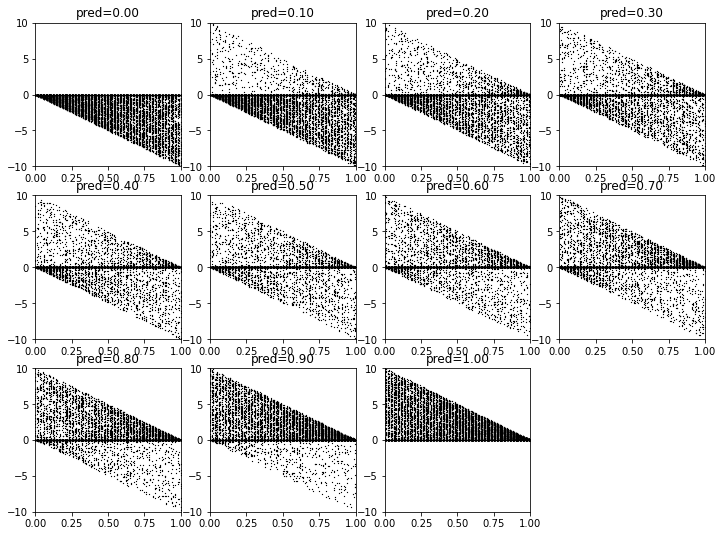

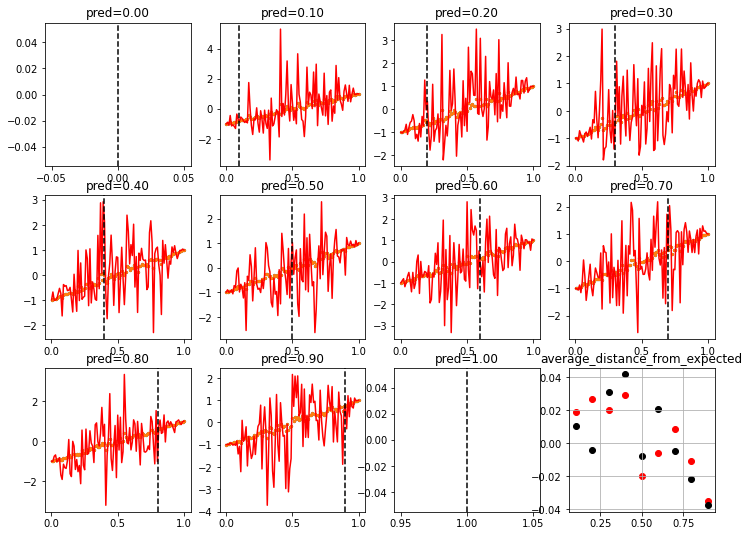

In [11]:
bm.diagnostic_agent_decision()

In [47]:
SENT_VALUE=0.2

mkt=bm.Market()
mkt.add_partition(1000, 'fixed_sentiment')
mkt.set_part_sentiment('fixed_sentiment', bm.sentiment_start_at_value(SENT_VALUE))
mkt.add_metric('sigma_scatter', bm.mtr_sct_sigma)


Building partition fixed_sentiment of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


In [48]:
mkt.run(365*2)

  0%|          | 0/730 [00:00<?, ?it/s]

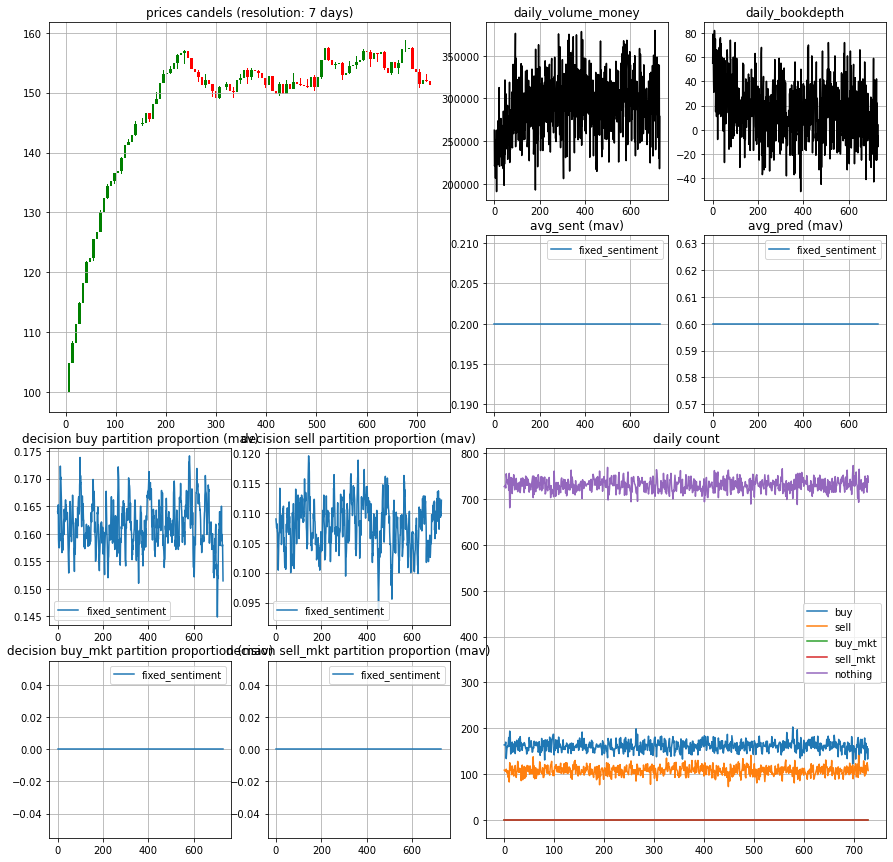

In [49]:
mkt.show_infograph()

In [50]:
bm.dir_timers()

  Latest run timer info:

    market_run_____________________________________________:___________29.901485 sec
    --market_metric________________________________________:____________2.516770 sec
    --market_step__________________________________________:___________26.944970 sec
    ----agent_tot_preliminar_______________________________:____________1.064856 sec
    ----agent_tot_thought__________________________________:____________1.794055 sec
    ----agent_tot_action___________________________________:___________20.552376 sec
    ------agent_def_decision_______________________________:___________11.852828 sec
    --------agent_def_sample_choice________________________:____________8.984946 sec
    --------agent_def_sample_price_________________________:____________1.061144 sec
    --------agent_def_sample_wealth________________________:____________0.863213 sec
    ------agent_def_action_________________________________:____________1.684936 sec
    --------book_order_processing______

In [51]:
ext_sigma=0.5+SENT_VALUE/2

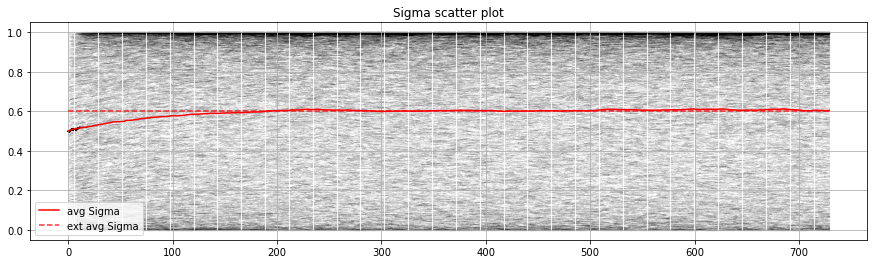

In [55]:
plt.figure(figsize=(15,4))
bm.plot_sigma_scatter(mkt, show_avg=True, ext_sigma=ext_sigma)
plt.show()

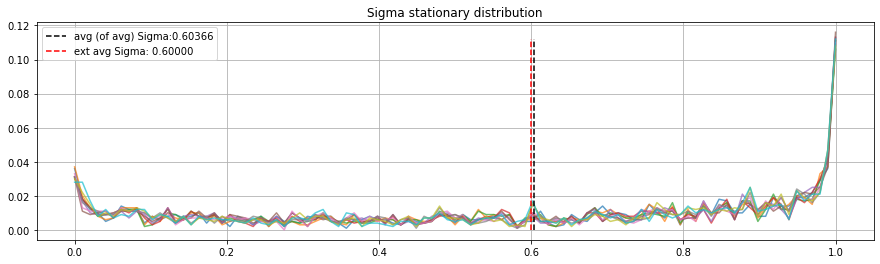

In [56]:
plt.figure(figsize=(15,4))
bm.plot_sigma_distribution(mkt, show_avg=True, ext_sigma=ext_sigma)
plt.show()

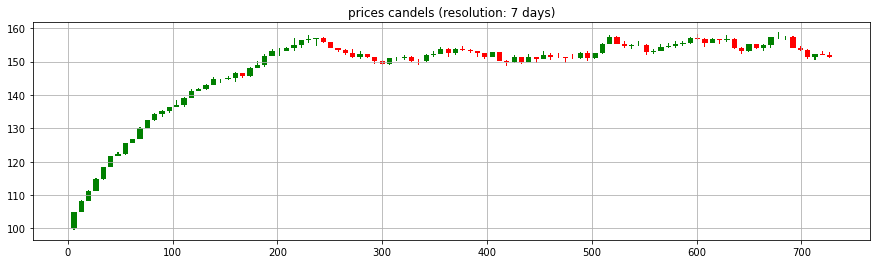

In [57]:
plt.figure(figsize=(15,4))
mkt.plot_price()
plt.show()

__beta market__

In [58]:
bm.change_default_parameter('decision', 'sw_mode', 'beta')

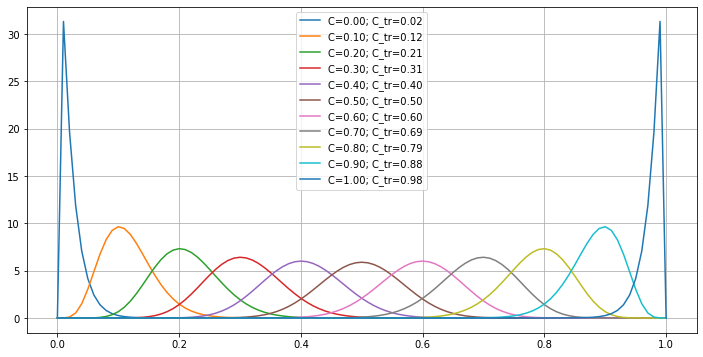

In [59]:
plt.figure(figsize=(12,6))
bm.show_default_sw_ansatz()

testing agent decision:
decision parameters:
    def_d_max : 0.75
    def_d_min : 0.25
    def_b_min : 0.0
    sw_mode : beta
    eta_coeff : 55
    sw_coeff : eq_dist
    sw_coeff_minmax : 0.02
    sw_coeff_postmap : <function <lambda> at 0x00000269194DC040>
    price_fluct : 0.001
    reference_price : last
    subaction_par : 0.0


  0%|          | 0/11 [00:00<?, ?it/s]

C:\Users\Utente\Desktop\Beam\beam.py:3678: RuntimeWarning: Mean of empty slice.
  pos_avg=np.array([val for val in sigma_new_theta[sigma_old] if val>0]).mean()
C:\Users\Utente\anaconda3\envs\beam\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Utente\Desktop\Beam\beam.py:3679: RuntimeWarning: Mean of empty slice.
  neg_avg=np.array([val for val in sigma_new_theta[sigma_old] if val<0]).mean()


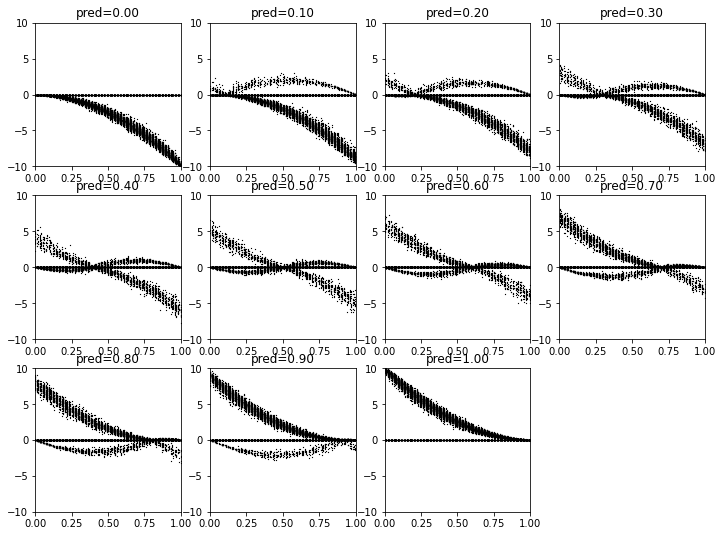

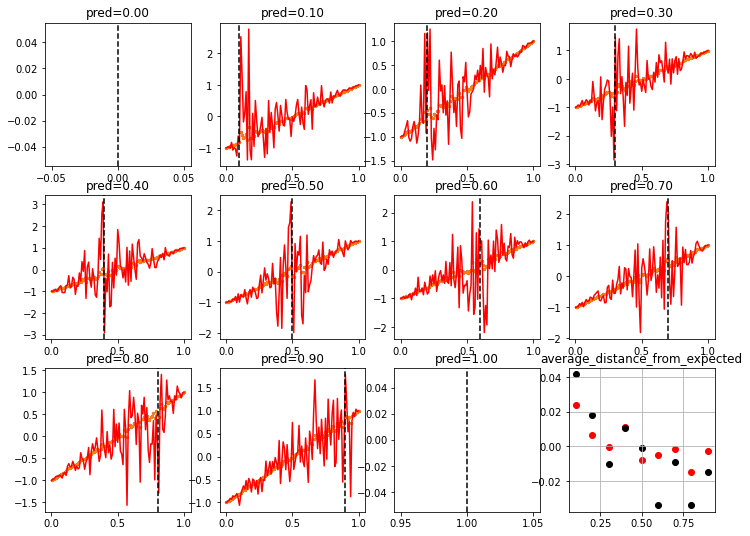

In [60]:
bm.diagnostic_agent_decision()

In [63]:
mkt_beta=bm.Market()
mkt_beta.add_partition(1000, 'fixed_sentiment')
mkt_beta.set_part_sentiment('fixed_sentiment', bm.sentiment_start_at_value(SENT_VALUE))
mkt_beta.add_metric('sigma_scatter', bm.mtr_sct_sigma)


Building partition fixed_sentiment of 1000 agents

  all agents tot_wealth will be: 10000
  all agents sigma_prop will be: 0.5


In [64]:
mkt_beta.run(365*2)

  0%|          | 0/730 [00:00<?, ?it/s]

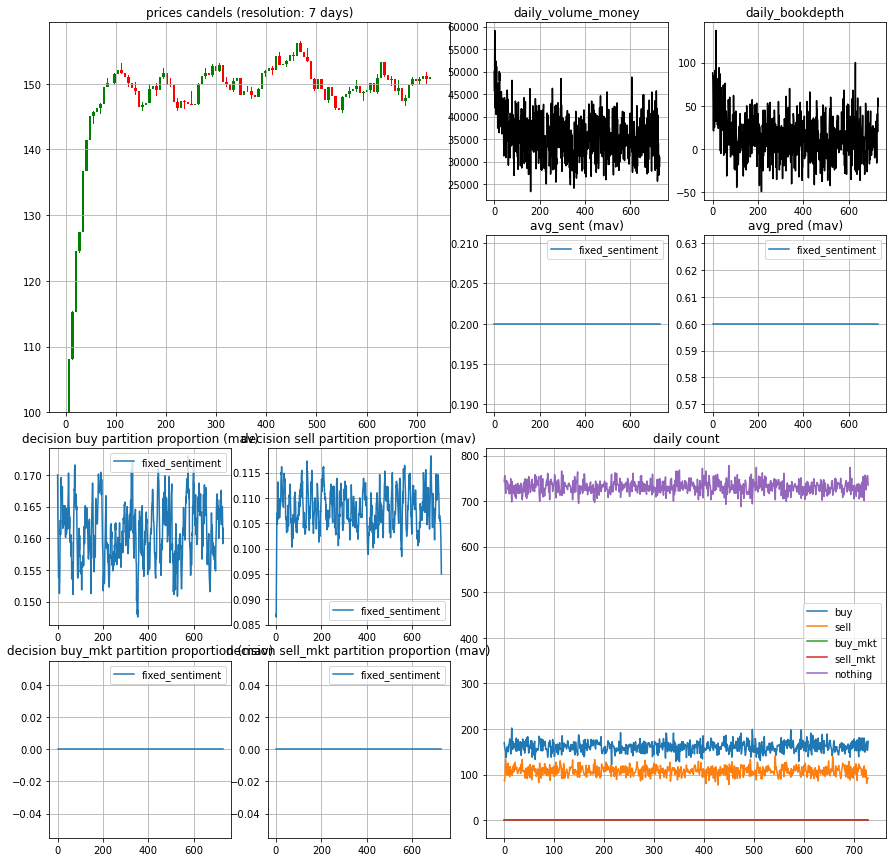

In [65]:
mkt_beta.show_infograph()

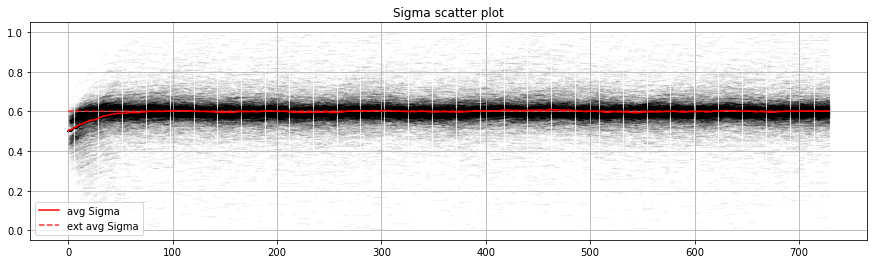

In [66]:
plt.figure(figsize=(15,4))
bm.plot_sigma_scatter(mkt_beta, show_avg=True, ext_sigma=ext_sigma)
plt.show()

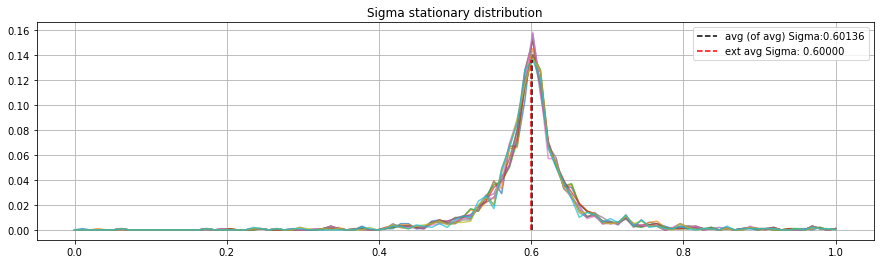

In [67]:
plt.figure(figsize=(15,4))
bm.plot_sigma_distribution(mkt_beta, show_avg=True, ext_sigma=ext_sigma)
plt.show()

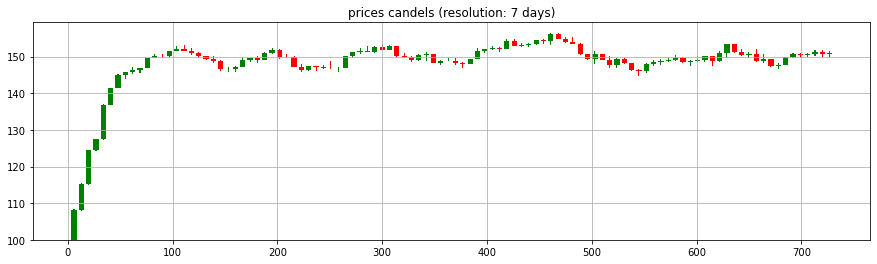

In [68]:
plt.figure(figsize=(15,4))
mkt_beta.plot_price()
plt.show()

__Complex market decisions__

In [27]:
cmp_mkt=bm.Market()

cmp_mkt.add_partition(1000, 'fixsent', sigma_prop='uniform', tot_wealth='uniform')
cmp_mkt.set_part_sentiment('fixsent', bm.sentiment_start_at_value(SENT_VALUE))

#there is a parameter to set trender susceptibility !!!!!!!!!!!!!!!!!
cmp_mkt.add_partition(1000, 'trender', sigma_prop='uniform', tot_wealth='uniform')
cmp_mkt.set_part_sentiment_bytrend('trender', 'MB')

# cmp_mkt.add_partition(1000, 'mavver', sigma_prop='uniform', tot_wealth='uniform')
# cmp_mkt.set_part_sentiment_bymavdiff('mavver', 'MB')


Building partition fixsent of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution

Building partition trender of 1000 agents

  agents tot_wealth will be sampled from uniform distribution
  agents sigma_prop will be sampled from uniform distribution


In [28]:
cmp_mkt.add_metric('sigma_scatter', bm.mtr_sct_sigma)

In [29]:
cmp_mkt.run(365*2)

  0%|          | 0/730 [00:00<?, ?it/s]

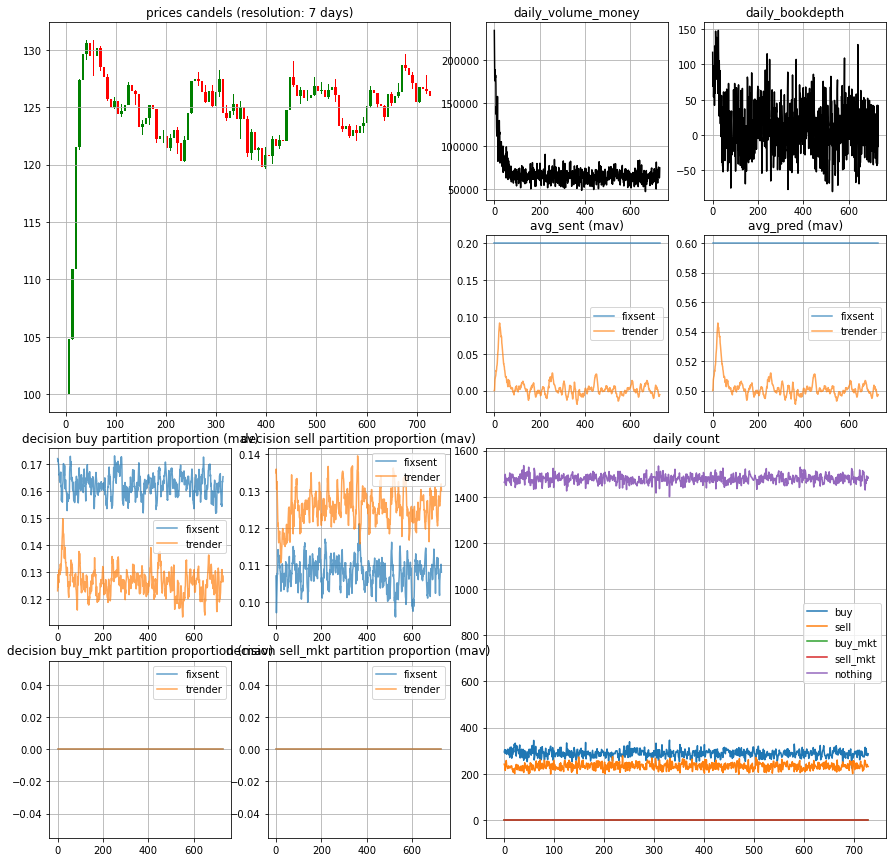

In [30]:
cmp_mkt.show_infograph()

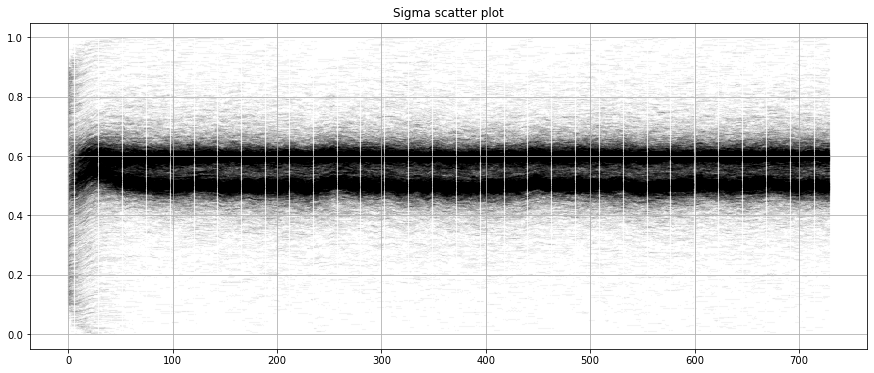

In [31]:
plt.figure(figsize=(15,6))
bm.plot_sigma_scatter(cmp_mkt)
plt.show()